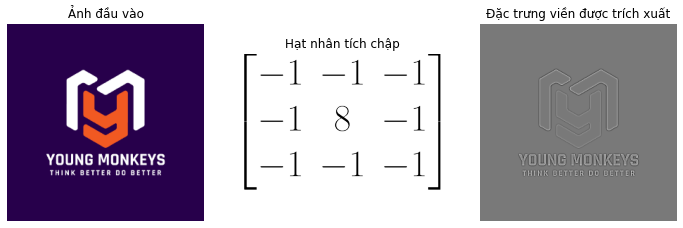

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

# Định nghĩa ma trận hạt nhân (kernel)
kernel = np.array([[-1, -1, -1], 
                   [-1,  8, -1], 
                   [-1, -1, -1]])

# Đọc ảnh từ file
original_image = io.imread('youngmonkeys.png')

# Chuyển ảnh sang dạng đen trắng
if len(original_image.shape) == 3:
    image = color.rgb2gray(original_image)

def convolve2d(image, kernel):
    """
    Hàm tính tích chập 2 chiều
    """
    output = np.zeros((image.shape[0] - 2, image.shape[1] - 2))
    for x in range(image.shape[1] - 2):
        for y in range(image.shape[0] - 2):
            output[y, x] = (kernel * image[y:y+3, x:x+3]).sum()

    return output

# Thực hiện phép tích chập
convolved_image = convolve2d(image, kernel)

# Vẽ ảnh gốc và ảnh đặc trưng được trích xuất
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Ảnh đầu vào')
plt.imshow(original_image, cmap='gray')
plt.axis('off')

kernel_image = io.imread('kernel.png')
plt.subplot(1, 3, 2)
plt.title('Hạt nhân tích chập')
plt.imshow(kernel_image)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Đặc trưng viền được trích xuất')
plt.imshow(convolved_image, cmap='gray')
plt.axis('off')

plt.savefig('convolution.png')
plt.show()